<h2> Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2> Loading the Dataset

In [2]:
df= pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

<h2> Data Pre-processing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [8]:
df.isnull().sum() #Since there are no null values no need to pre-process except the categorical variable to numerical variables

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
df['EmployeeCount'].nunique()

1

In [10]:
df['StandardHours'].nunique()

1

In [11]:
df['Over18'].nunique()

1

In [12]:
categorical_columns = df.select_dtypes(include=['object'])
categorical_column_names = categorical_columns.columns.tolist()
print(categorical_column_names)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [13]:
df = df.drop(columns=['EmployeeCount', 'StandardHours', 'EmployeeNumber', 'Over18'])

In [14]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [15]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [16]:
#Value couts of categorical columns
for i in df.columns:
    if df[i].dtype == object:
        print(str(i) + ' : ' + str(df[i].unique()))
        print(df[i].value_counts())
        print("________________________________________________________________________________")

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
________________________________________________________________________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
________________________________________________________________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
________________________________________________________________________________
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
____________________________

In [17]:
#Checking for any dupicated values
df.duplicated().sum()

0

C:\Users\chara\AppData\Local\Temp\ipykernel_9912\1534808772.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot= True)


<Axes: >

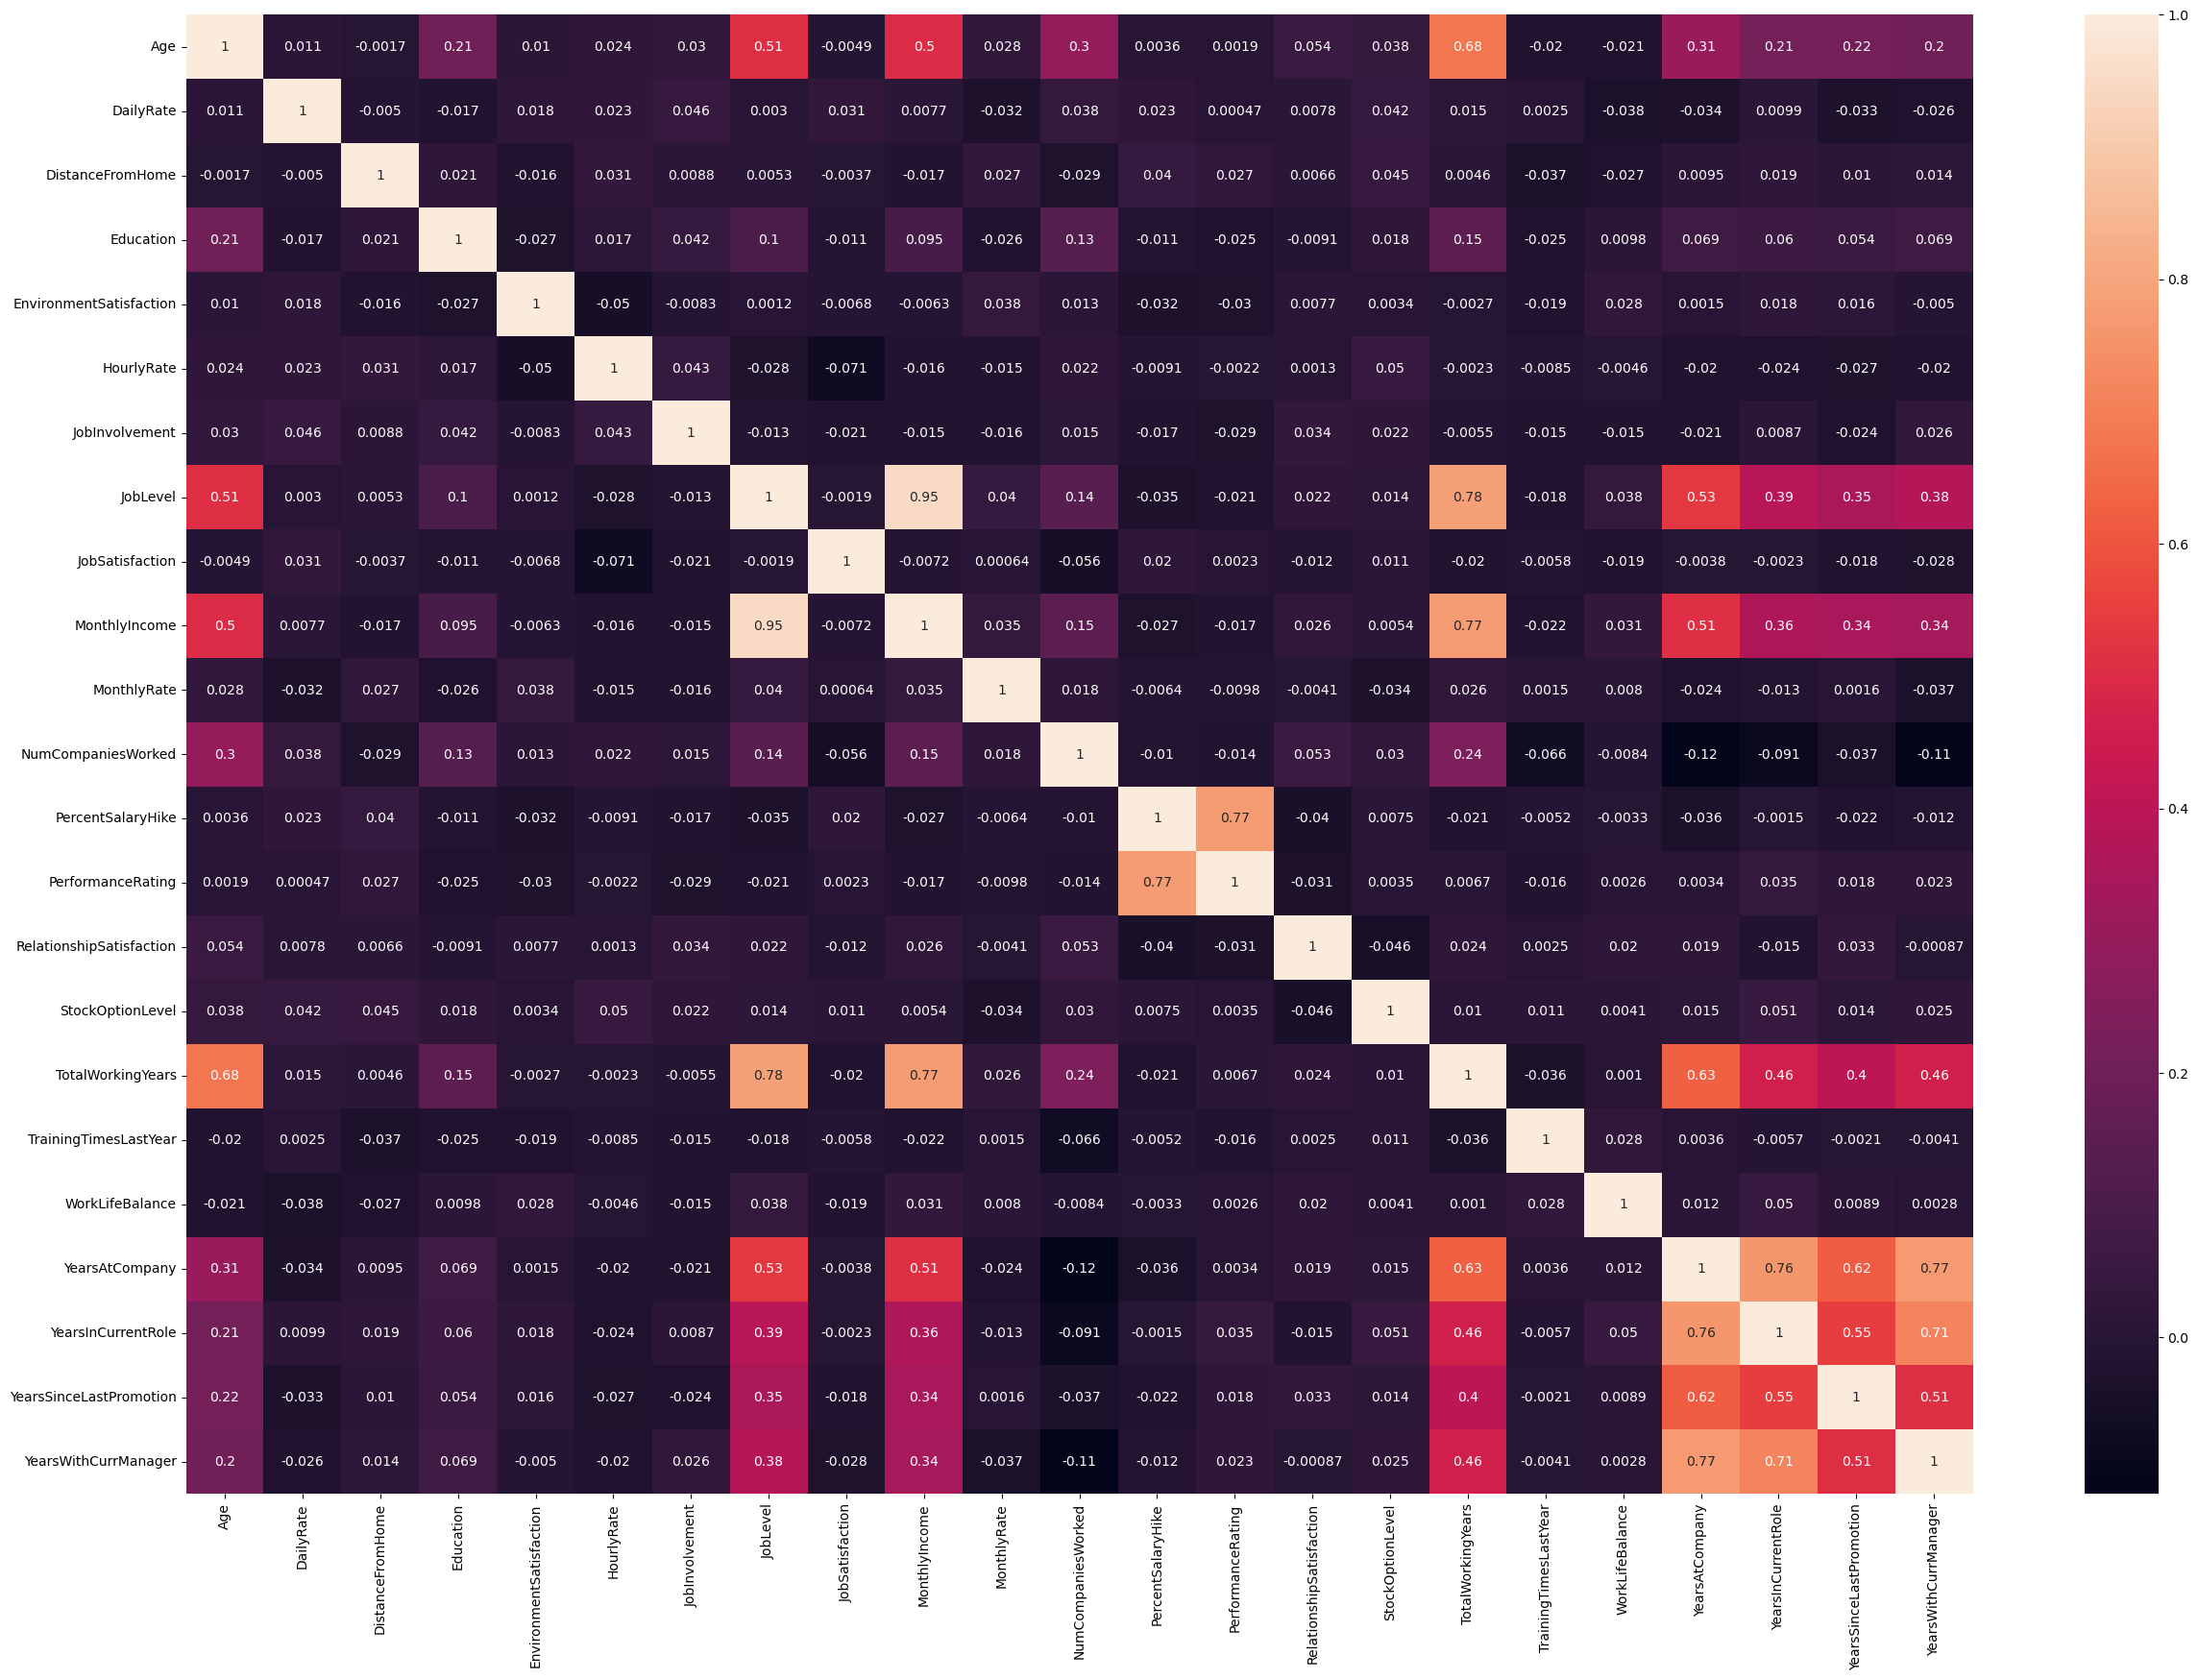

In [18]:
plt.subplots(figsize= (30, 20))
sns.heatmap(df.corr(), annot= True)

Since there are no values shown in the corr map for columns["Employee Count" and "Standard Hours"] and
"Employee number" also doesn't affect the "Attrition" Feature and since all the employees are "Over18" it also doesn;t affect the
target variable so it's better to drop the above mentioned columns.


Monthly Income and Job Level are the most positively correlated variables.
Number of companies worked is the least correlated varibale.

In [19]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [20]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2



<h2> Data Visualisations

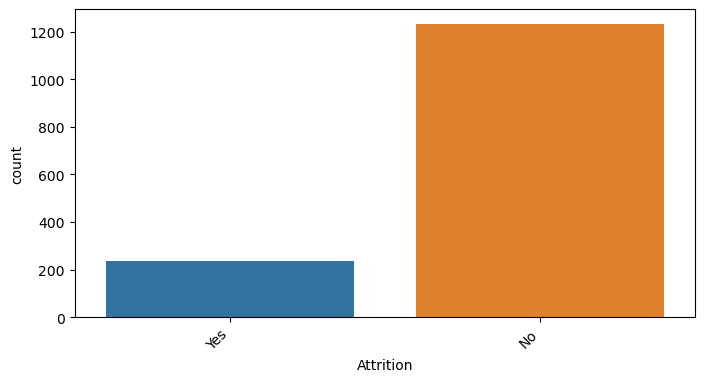

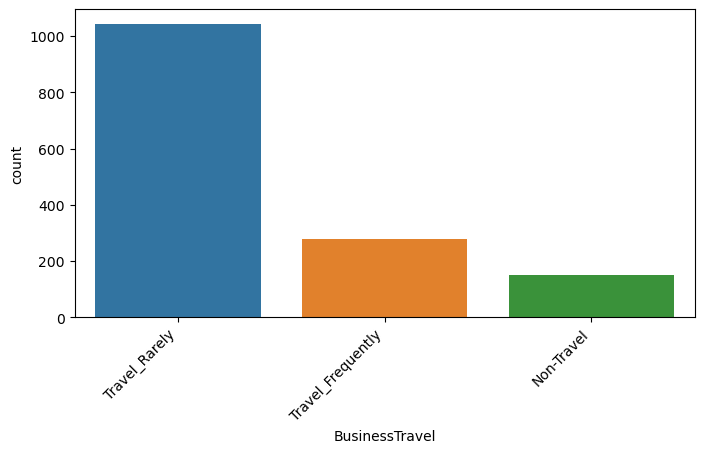

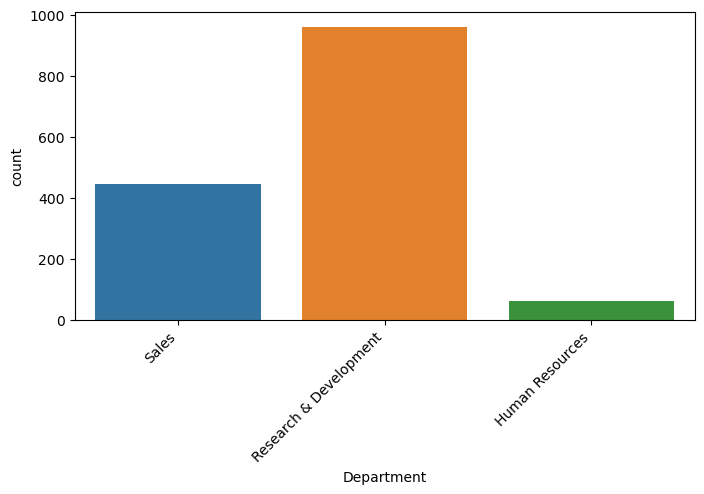

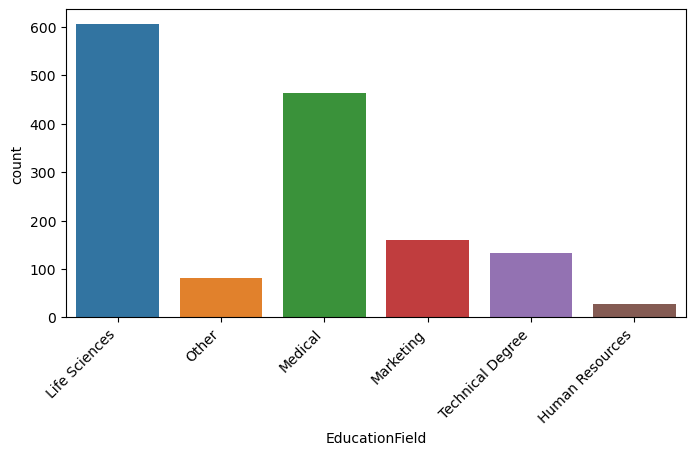

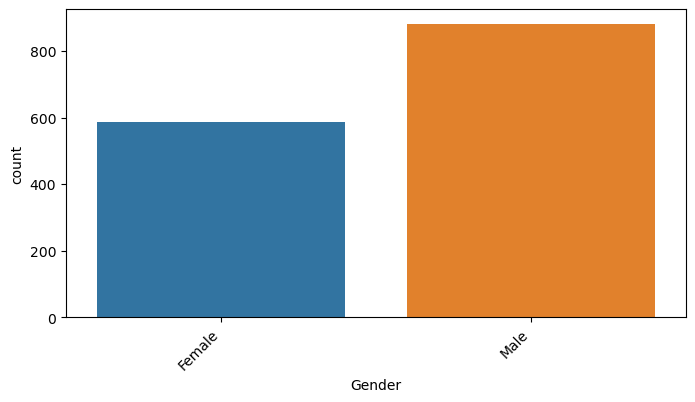

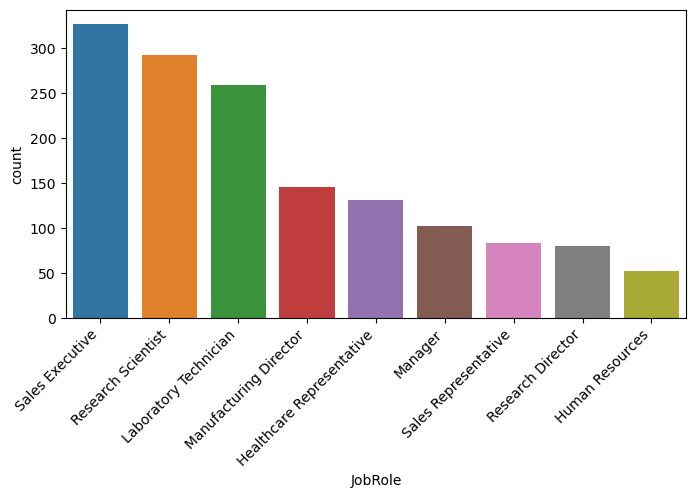

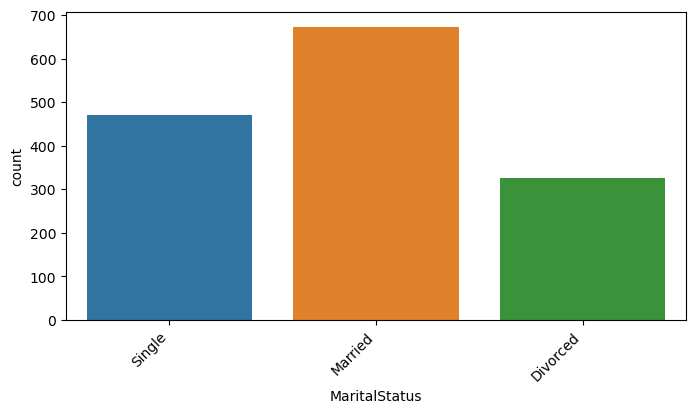

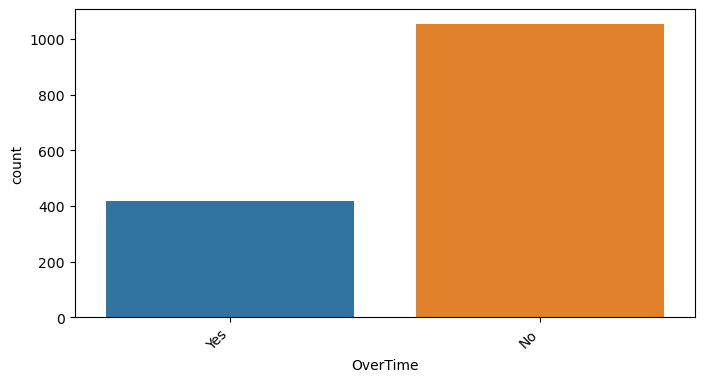

In [21]:
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    plt.subplots(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45, ha='right')

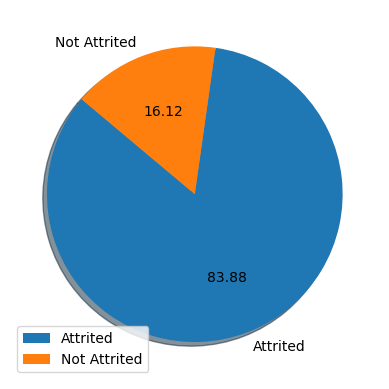

In [22]:
#Pie plot of Attrition
target=df.iloc[:,1].value_counts()
plt.title= ("Attrition Rate")
plt.pie(target,labels=["Attrited","Not Attrited"],autopct = "%0.2f",shadow = True,startangle = 140)
plt.legend(loc = "lower left")

<Axes: xlabel='Gender', ylabel='count'>

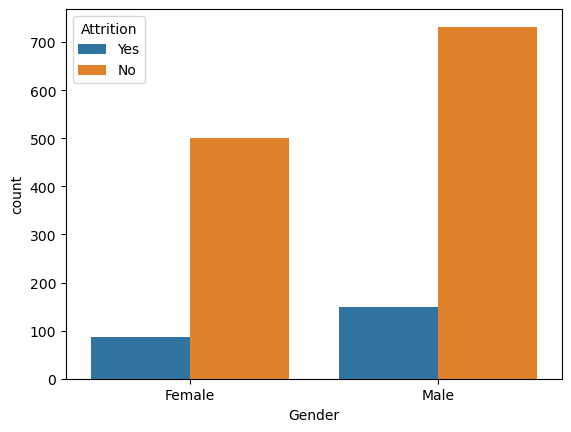

In [23]:
#Gender wise Attrition
sns.countplot(data= df, x= "Gender", hue= "Attrition")

Looks like the gender doesn't effect the attrition in a large difference

  Attrition     BusinessTravel  Count
0        No      Travel_Rarely    887
1        No  Travel_Frequently    208
2        No         Non-Travel    138
3       Yes      Travel_Rarely    156
4       Yes  Travel_Frequently     69
5       Yes         Non-Travel     12


<Axes: xlabel='BusinessTravel', ylabel='count'>

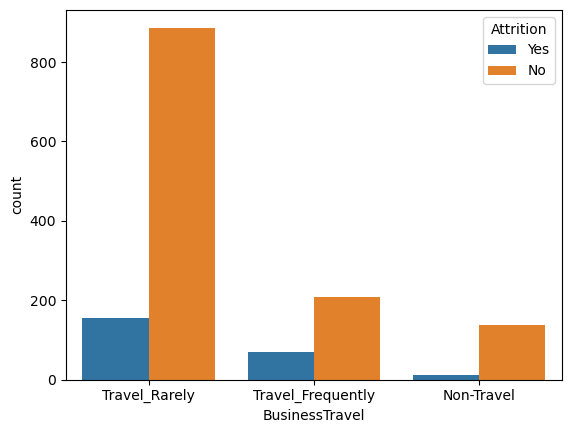

In [24]:
#Attrition by Business Travel
grouped_travel = df.groupby("Attrition")["BusinessTravel"].value_counts().reset_index(name="Count")
print(grouped_travel)
sns.countplot(data= df, x= "BusinessTravel", hue= "Attrition")

Employees who travel frequently have more attrition rate when compared to Travel rarely and Non-Travel when comparing the Attrition rates of each types of travel side by side

Attrition_Rates of Business_Travels:

i) Travel-Rarely= 15%
ii) Travel-Frequently= 25%
iii) Non-Travel= 8%


In [25]:
grouped_department = df.groupby("Attrition")["Department"].value_counts().reset_index(name="Count")
grouped_department

,Attrition,Department,Count
0,No,Research & Development,828
1,No,Sales,354
2,No,Human Resources,51
3,Yes,Research & Development,133
4,Yes,Sales,92
5,Yes,Human Resources,12


<Axes: xlabel='Department', ylabel='count'>

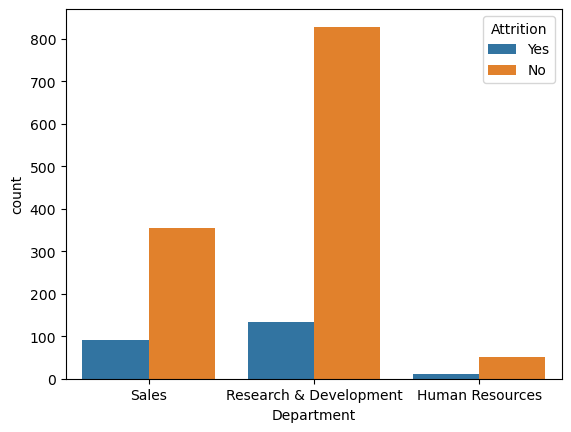

In [26]:
#How's Department affecting Attrition
sns.countplot(data= df, x= "Department", hue= "Attrition")

Employees from Human Resources department are the least attritted and there is not much difference between Sales and R&D department.

The most common department of attritions is the "Research & Development" department, with a count of 133 employees who left. This is followed by the "Sales" department with 92 employees who left and the "Human Resources" department with 12 employees who left.

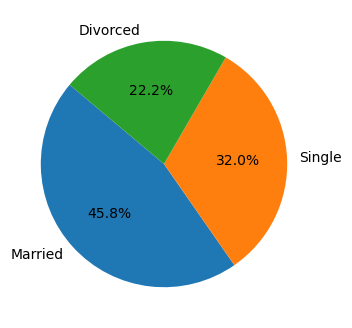

In [27]:
#Marital Status affecting Transition
marital_status_counts = df['MaritalStatus'].value_counts()
marital_status_percentages = (marital_status_counts / len(df)) * 100

plt.figure(figsize=(6, 4))
plt.pie(marital_status_percentages, labels=marital_status_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title= ('Marital Status Distribution')

<Axes: xlabel='MaritalStatus', ylabel='count'>

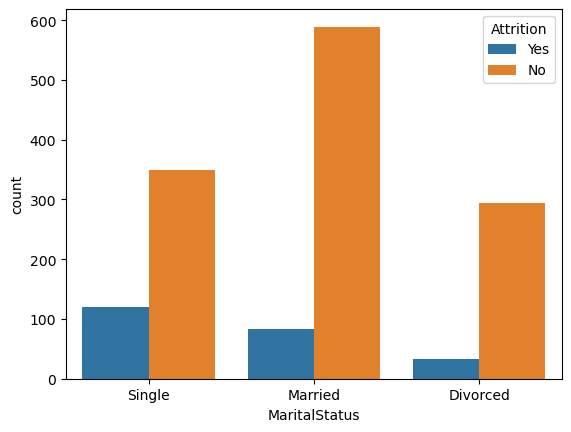

In [28]:
sns.countplot(data= df, x= "MaritalStatus", hue= "Attrition")

In [29]:
#Salary affecting Attrition
grouped_department = df.groupby("Attrition")["MonthlyIncome"].value_counts().reset_index(name="Count")
grouped_department

,Attrition,MonthlyIncome,Count
0,No,2342,3
1,No,2451,3
2,No,2559,3
3,No,3452,3
4,No,5562,3
...,...,...,...
1383,Yes,18824,1
1384,Yes,19246,1
1385,Yes,19545,1
1386,Yes,19845,1


In [30]:
df["MonthlyIncome"].describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

<Axes: >

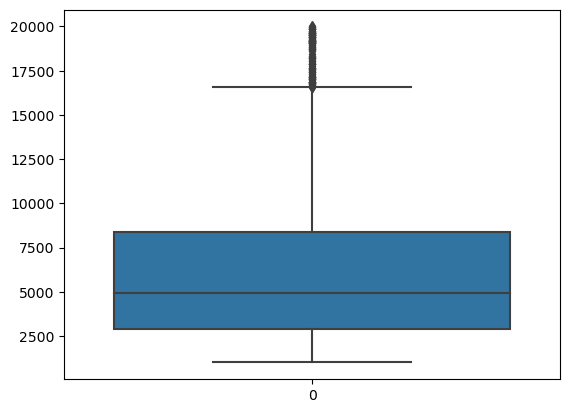

In [31]:
sns.boxplot(df["MonthlyIncome"])

<Axes: title={'center': 'Attrition vs MonthlyIncome (Violin Plot)'}, xlabel='Attrition', ylabel='MonthlyIncome'>

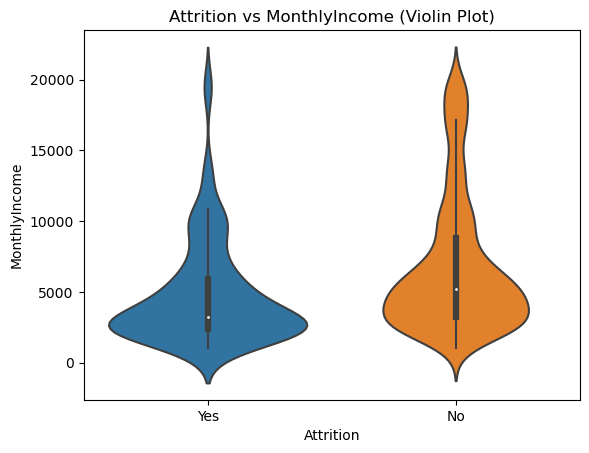

In [32]:
vp= sns.violinplot(x= "Attrition", y= "MonthlyIncome", data=df)
vp.set(title= "Attrition vs MonthlyIncome (Violin Plot)")
vp

From the above plot it looks like employees having salaries < 5000 are the most attrition.

   Attrition                    JobRole  Count
0         No            Sales Executive    269
1         No         Research Scientist    245
2         No      Laboratory Technician    197
3         No     Manufacturing Director    135
4         No  Healthcare Representative    122
5         No                    Manager     97
6         No          Research Director     78
7         No       Sales Representative     50
8         No            Human Resources     40
9        Yes      Laboratory Technician     62
10       Yes            Sales Executive     57
11       Yes         Research Scientist     47
12       Yes       Sales Representative     33
13       Yes            Human Resources     12
14       Yes     Manufacturing Director     10
15       Yes  Healthcare Representative      9
16       Yes                    Manager      5
17       Yes          Research Director      2


<Axes: xlabel='JobRole', ylabel='count'>

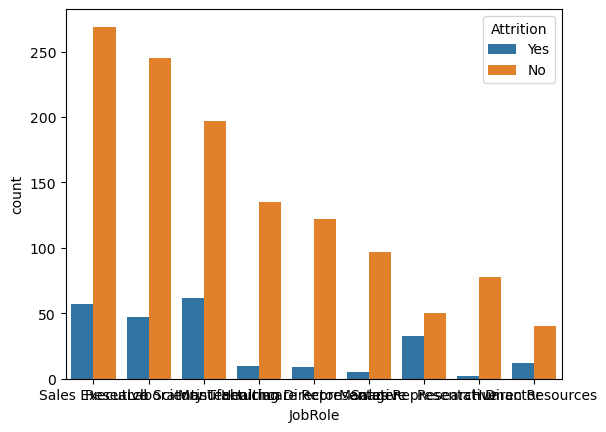

In [33]:
grouped_department = df.groupby("Attrition")["JobRole"].value_counts().reset_index(name="Count")
print(grouped_department)
sns.countplot(data=df, x= "JobRole", hue= "Attrition")

<Axes: xlabel='YearsInCurrentRole', ylabel='Count'>

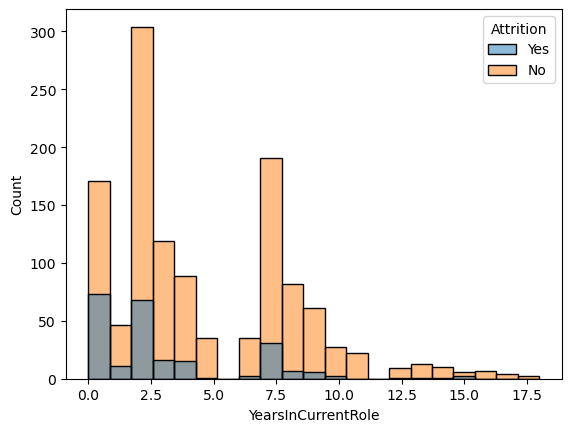

In [34]:
sns.histplot(data= df, x= "YearsInCurrentRole", hue= "Attrition")

People with same role have attrition between 0 and 2.5 the most, this can be due to outliers in the data.

<Axes: xlabel='YearsWithCurrManager', ylabel='Count'>

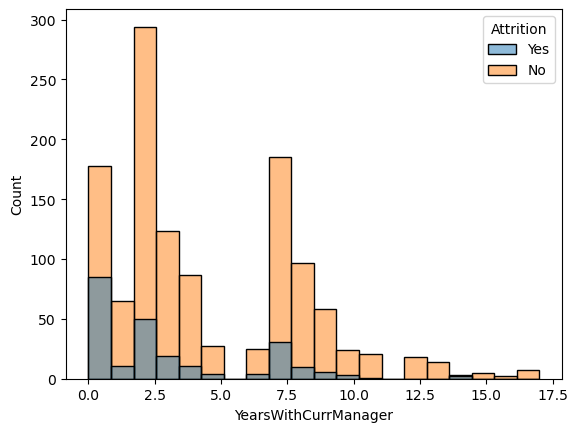

In [35]:
 df.groupby("YearsWithCurrManager")["Attrition"].value_counts().reset_index(name="Count")

sns.histplot(data= df, x= "YearsWithCurrManager", hue= "Attrition")

It seems about 14% from employees spent less than one year with the current manager and about 32% from them Attrition.

<h2> Encoding Categorical Variables to Numerical

In [36]:
df = pd.get_dummies(data=df, drop_first=True)

In [37]:
df.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,1,0,0,0,0,0,0,1,0,0


<h2> Splitting the data into Training and Testing

In [38]:
# Splitting the data into training and testing
X = df.drop(columns=['Attrition_Yes'])
y = df['Attrition_Yes']

In [39]:
X.shape

(1470, 44)

<h2> Model Building

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state= 11)

In [41]:
X_train.shape, X_test.shape

((1176, 44), (294, 44))

<h2> Scaling the values in the dataset

In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<h2> Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
lo = LogisticRegression()

In [44]:
lo.fit(X_train, y_train)

LogisticRegression()

In [45]:
y_pred= lo.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
accuracy_score(y_test, y_pred)

0.8945578231292517

In [47]:
confusion_matrix(y_test,y_pred)

array([[238,   8],
       [ 23,  25]], dtype=int64)

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       246
           1       0.76      0.52      0.62        48

    accuracy                           0.89       294
   macro avg       0.83      0.74      0.78       294
weighted avg       0.89      0.89      0.89       294



<h2> Decision Tree Classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

In [50]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [51]:
dt_predictions = dt_model.predict(X_test)

In [52]:
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.7585034013605442


In [53]:
confusion_matrix(y_test,y_pred)

array([[238,   8],
       [ 23,  25]], dtype=int64)

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       246
           1       0.76      0.52      0.62        48

    accuracy                           0.89       294
   macro avg       0.83      0.74      0.78       294
weighted avg       0.89      0.89      0.89       294



<h2> Parameter Tuning For Decision Tree

In [55]:
from sklearn.model_selection import GridSearchCV
parameter={
 'criterion':['gini','entropy'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']

}

In [56]:
dtc_cv=GridSearchCV(estimator=dt_model,param_grid=parameter,cv=5,scoring="accuracy")

In [57]:
dtc_cv.fit(X_train,y_train) # fitting the data

C:\Users\chara\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\chara\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\chara\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\chara\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\chara\anaconda3\Lib\site-packag

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [58]:
dtc_cv.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [59]:
pred=dtc_cv.predict(X_test)

In [60]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       246
           1       0.60      0.12      0.21        48

    accuracy                           0.84       294
   macro avg       0.73      0.55      0.56       294
weighted avg       0.81      0.84      0.80       294



In [61]:
accuracy_score(y_test,pred)

0.8435374149659864

<h2>Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [63]:
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

In [64]:
rfc_cv= GridSearchCV(rfc,param_grid=forest_params,cv=10,scoring="accuracy")

In [65]:
rfc_cv.fit(X_train,y_train)

C:\Users\chara\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
50 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\chara\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\chara\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\chara\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\chara\anaconda3\Lib\site-packages

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13]}],
             scoring='accuracy')

In [66]:
pred_rf=rfc_cv.predict(X_test)

In [67]:
accuracy_score(y_test,pred_rf)

0.8673469387755102

In [68]:
confusion_matrix(y_test,pred_rf)

array([[244,   2],
       [ 37,  11]], dtype=int64)

In [69]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       246
           1       0.85      0.23      0.36        48

    accuracy                           0.87       294
   macro avg       0.86      0.61      0.64       294
weighted avg       0.86      0.87      0.83       294

